In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 한글 처리 (코랩에서와 로컬PC(윈,맥,리)와 조금 다름)
import matplotlib as mpl

# 코랩에서만 추가되는 부분
%config InlineBackend.figure_format = 'retina'

# 설치 : 코랩이 운용되는 우분트 리눅스에 설치
# !명령어
!apt -qq -y install fonts-nanum

# 폰트 정보 추출
# 폰트의 실제 위치 : /usr/share/fonts/truetype/nanum/*.ttf
import matplotlib.font_manager as fm
# 실제 파일 > 우클릭 > 경로복사
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties( fname=path, size=10 )

# 실제 적용, 실제적으로 실제 폰트가 존재하고, 그 이름을 정확하게 안다면
# 아래 한줄로 처리 가능
plt.rc( 'font', family=font.get_name() )
mpl.font_manager._rebuild()

# 빌트인
%matplotlib inline

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
from collections import Counter


In [ ]:
path='/content/drive/My Drive/Phoenix/Extra_Data/Insta_tags/instaResults.xlsx'
instaResults = pd.read_excel(path)
instaResults.head()

,content,date,tags
0,"🍲🍲오늘 저녁은 얼큰한 소곱창전골⠀소곱창전골 여러곳에서 먹어봤는데야들한 소곱창, 고...",2020-05-23,"['#통일소곱창전골', '#소곱창전골', '#곱창전골', '#계란말이', '#꼬마돈..."
1,...#광고 #제품협찬장어구이 힘힘힘!!!장어는 보기만해도힘이 불끈하는것같아요♡수협...,2020-07-19,"['#광고', '#제품협찬장어구이', '#장어구이', '#수협쇼핑', '#수협', ..."
2,새콤한 소스를 덮은 닭가슴살 #심플리ᄏ...,2020-05-12,"['#심플리쿡', '#유린기.상큼한']"
3,"아무것도 하기싫은 수요일 저녁에,#비움반찬 으로,, 최고의 저녁을 ❤.#돼지갈비찜 ...",2020-07-22,"['#비움반찬', '#돼지갈비찜', '#소불고기버섯전골', '#갈비찜', '#매운돼..."
4,#동미공구..#삼삼해물 밀키트 공구 오픈ᄒ...,2020-07-20,"['#동미공구..', '#삼삼해물', '#바지락토ᄆ..."


In [ ]:
instaResults.tags

0       ['#통일소곱창전골', '#소곱창전골', '#곱창전골', '#계란말이', '#꼬마돈...
1       ['#광고', '#제품협찬장어구이', '#장어구이', '#수협쇼핑', '#수협', ...
2                  ['#심플리쿡', '#유린기.상큼한']
3       ['#비움반찬', '#돼지갈비찜', '#소불고기버섯전골', '#갈비찜', '#매운돼...
4       ['#동미공구..', '#삼삼해물', '#바지락토ᄆ...
                              ...                        
1723    ['#리그램', '#장성진품갈비탕여니', '#이건꼭사야해⠀𖤐갈비탕➜', '#푸드스타...
1724    ['#송화버섯샐러드', '#파머스옥남', '#다이닝옥남', '#카페옥남', '#크로...
1725             ['#밀키트', '#마이셰프', '#탁탁송댄스챌린지70을', '#영탁']
1726    ['#20200720', '#스테이크', '#새벽배송', '#ss...
1727    ['#오빠가', '#차려준', '#집밥', '#ㅋㅋ', '#소곱창전골', '#밀키트...
Name: tags, Length: 1728, dtype: object

In [ ]:
insta_tags = list()

for tags in instaResults['tags']:
  tags_list = tags[2:-2].split("', '")
  for tag in tags_list:
    insta_tags.append(tag)

In [ ]:
len(insta_tags)

24073

In [ ]:
insta_tags[-100:]

['#술안주',
 '#소주안주',
 '#안주스타',
 '#안주스타그램',
 '#안주키트',
 '#곱창전골',
 '#매운안주',
 '#소주안주',
 '#비오는날안주',
 '#장마철',
 '#대창전골',
 '#먹스타',
 '#맛스타',
 '#맛스타그램',
 '#밥스타그램',
 '#리그램',
 '#장성진품갈비탕여니',
 '#이건꼭사야해⠀𖤐갈비탕➜',
 '#푸드스타그램',
 '#맛스타그램',
 '#맛있다그램',
 '#먹스타그램',
 '#아기먹방',
 '#유아먹방',
 '#갈비탕',
 '#갈비탕맛집',
 '#진품갈비탕',
 '#쿡님',
 '#왕갈비탕',
 '#갈비탕맛집',
 '#갈비탕포장맛집',
 '#원피스갈비탕',
 '#갈비탕추천',
 '#몸보신',
 '#부모님선물',
 '#선물추천',
 '#밀키트',
 '#밀키트추천⠀',
 '#송화버섯샐러드',
 '#파머스옥남',
 '#다이닝옥남',
 '#카페옥남',
 '#크로스핏',
 '#식단조절',
 '#비트',
 '#비건샐러드',
 '#뮤직스피닝',
 '#간편식',
 '#배달샐러드',
 '#다이어트',
 '#홈트',
 '#언택트',
 '#헬스',
 '#체질개선',
 '#속초미용실',
 '#요가',
 '#다이어트샐러드',
 '#속초샐러드',
 '#샐러드도시락',
 '#단체주문샐러드',
 '#식이요법',
 '#웨이트식단',
 '#다이어트식단',
 '#밀키트',
 '#밀키트',
 '#마이셰프',
 '#탁탁송댄스챌린지70을',
 '#영탁',
 '#20200720',
 '#스테이크',
 '#새벽배송',
 '#ssg새벽배송',
 '#밀키트',
 '#프레시지',
 '#블랙라벨스테이크',
 '#스타우브',
 '#스타우브더블핸들',
 '#오덴세',
 '#오덴세스멜트',
 '#staub',
 '#오빠가',
 '#차려준',
 '#집밥',
 '#ㅋㅋ',
 '#소곱창전골',
 '#밀키트',
 '#롯데마트꼬',
 '#마싯',
 '#내장탕',


In [ ]:
tag_counts = Counter(insta_tags)

In [ ]:
tag_counts.most_common(50)

[('#밀키트', 836),
 ('#쿠킹박스', 535),
 ('#밀키트', 282),
 ('#집밥', 167),
 ('#홈쿡', 166),
 ('#쿠킹박스', 159),
 ('#먹스타그램', 158),
 ('#캠핑요리', 116),
 ('', 114),
 ('#혼밥', 108),
 ('#간편식', 105),
 ('#맛스타그램', 96),
 ('#캠핑', 92),
 ('#집들이음식', 92),
 ('#간편요리', 88),
 ('#밀키트추천', 82),
 ('#집밥스타그램', 81),
 ('#요리스타그램', 81),
 ('#곱창전골', 79),
 ('#캠핑음식', 79),
 ('#먹스타그램', 75),
 ('#맛집', 68),
 ('#술안주', 65),
 ('#집밥', 65),
 ('#홈파티', 63),
 ('#협찬', 62),
 ('#택배맛집', 59),
 ('#반조리식품', 57),
 ('#일상', 57),
 ('#마이셰프', 57),
 ('#캠핑요리', 56),
 ('#홈쿡스타그램', 56),
 ('#온더테이블', 56),
 ('#홈쿡', 56),
 ('#자취요리', 54),
 ('#홈파티음식', 53),
 ('#주부스타그램', 53),
 ('#저녁메뉴', 52),
 ('#스테이크', 51),
 ('#문현전통한우곱창전골', 50),
 ('#먹방', 50),
 ('#인스타푸드', 49),
 ('#혼술', 47),
 ('#수제라멘', 46),
 ('#쿡스타그램', 46),
 ('#캠핑', 46),
 ('#리그램', 45),
 ('#야식', 44),
 ('#간편식', 43),
 ('#맛스타그램', 43)]

In [ ]:
for i in range(114): 
  insta_tags.remove('')

In [ ]:
tag_counts = Counter(insta_tags)

In [ ]:
tag_counts.most_common(100)

[('#밀키트', 836),
 ('#쿠킹박스', 535),
 ('#밀키트', 282),
 ('#집밥', 167),
 ('#홈쿡', 166),
 ('#쿠킹박스', 159),
 ('#먹스타그램', 158),
 ('#캠핑요리', 116),
 ('#혼밥', 108),
 ('#간편식', 105),
 ('#맛스타그램', 96),
 ('#캠핑', 92),
 ('#집들이음식', 92),
 ('#간편요리', 88),
 ('#밀키트추천', 82),
 ('#집밥스타그램', 81),
 ('#요리스타그램', 81),
 ('#곱창전골', 79),
 ('#캠핑음식', 79),
 ('#먹스타그램', 75),
 ('#맛집', 68),
 ('#술안주', 65),
 ('#집밥', 65),
 ('#홈파티', 63),
 ('#협찬', 62),
 ('#택배맛집', 59),
 ('#반조리식품', 57),
 ('#일상', 57),
 ('#마이셰프', 57),
 ('#캠핑요리', 56),
 ('#홈쿡스타그램', 56),
 ('#온더테이블', 56),
 ('#홈쿡', 56),
 ('#자취요리', 54),
 ('#홈파티음식', 53),
 ('#주부스타그램', 53),
 ('#저녁메뉴', 52),
 ('#스테이크', 51),
 ('#문현전통한우곱창전골', 50),
 ('#먹방', 50),
 ('#인스타푸드', 49),
 ('#혼술', 47),
 ('#수제라멘', 46),
 ('#쿡스타그램', 46),
 ('#캠핑', 46),
 ('#리그램', 45),
 ('#야식', 44),
 ('#간편식', 43),
 ('#맛스타그램', 43),
 ('#요리', 41),
 ('#파스타', 41),
 ('#koreanfood', 39),
 ('#간편요리', 39),
 ('#간단요리', 39),
 ('#JMT', 38),
 ('#신혼밥상', 38),
 ('#떡볶이', 37),
 ('#캠핑음식', 37),
 ('#맞팔'

In [ ]:
from wordcloud import WordCloud

(-0.5, 799.5, 799.5, -0.5)

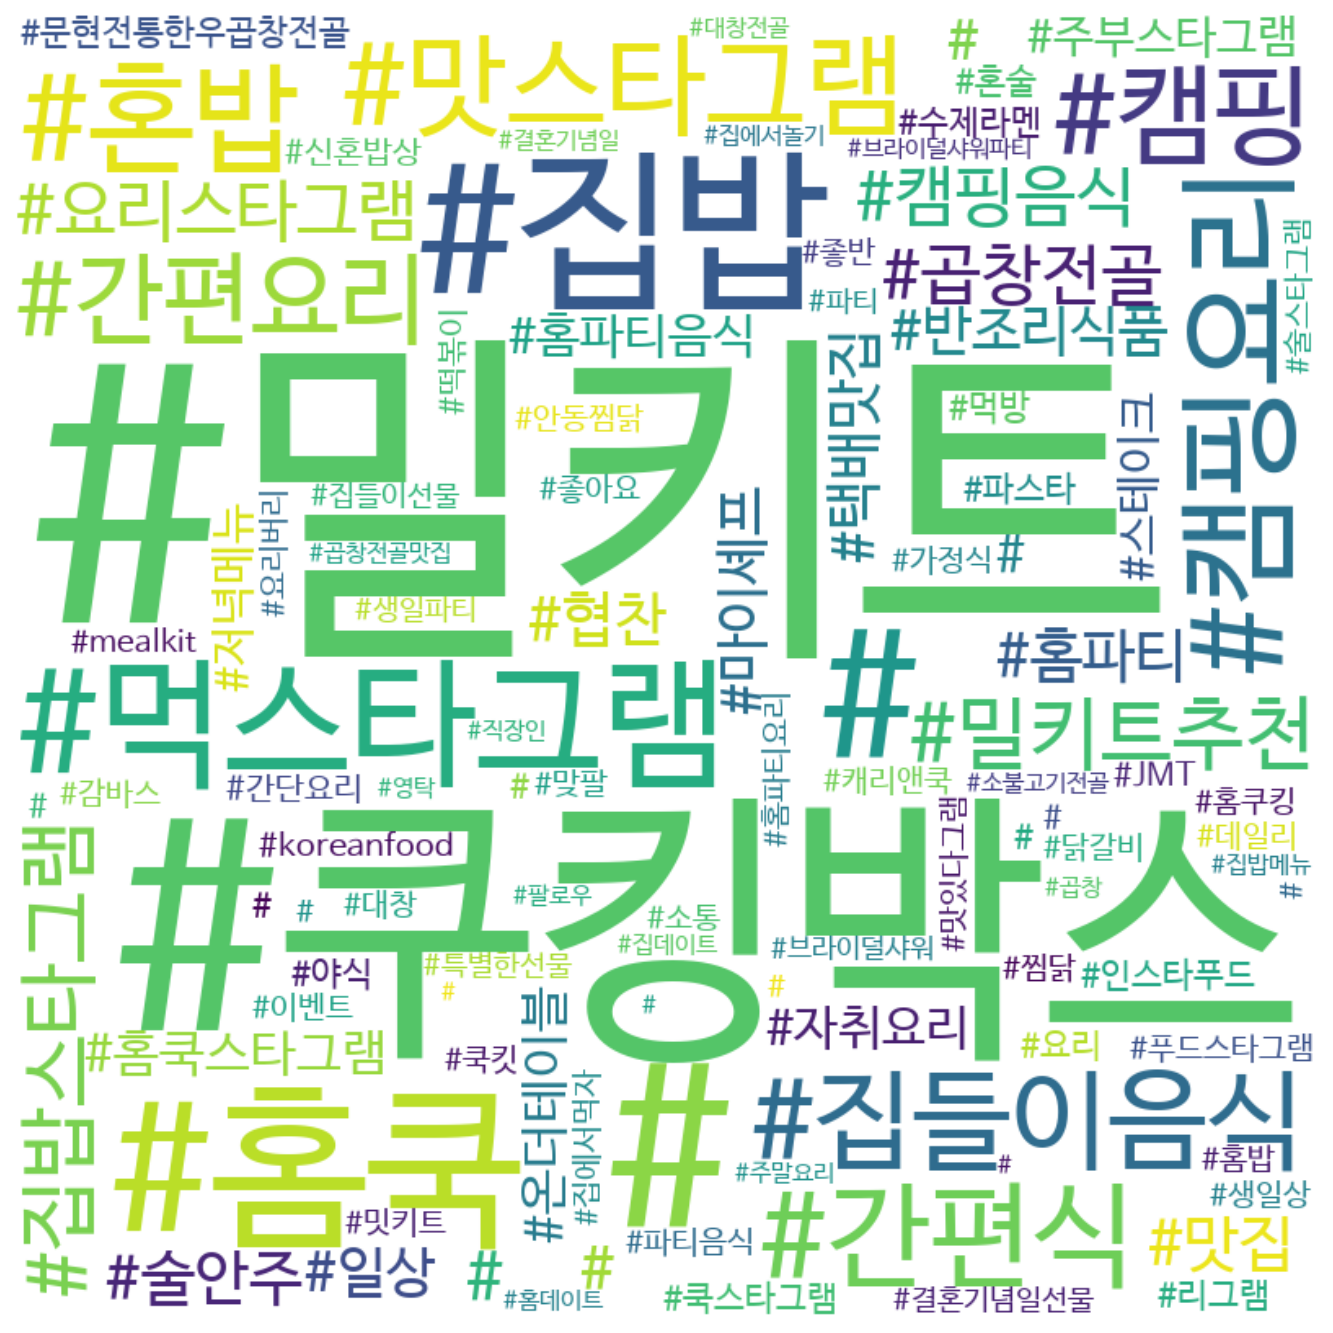

In [ ]:
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', background_color='white', max_words=110, relative_scaling=0.5,
                      width=800, height=800).generate_from_frequencies(tag_counts)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')